<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L05_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Practice**

## **Titanic - Kaggle Competition**
- Titanic - Machine Learning from Disaster
 - https://www.kaggle.com/competitions/titanic

 - 타이타닉호 탑승자 정보로부터 생존 여부를 예측하는 대회

<br>

- Titanic Dataset
 - Survival - 생존 여부 (0-사망 / 1-생존)
 - Pclass - 티켓등급 (1/2/3)
 - Sex - 성별 (male, female)
 - Age - 나이
 - Sibsp - 타이타닉호에 승선한 형제/배우자 수
 - Parch - 타이타닉호에 승선한 부모/자녀 수
 - Ticket - 티켓 번호
 - Fare - 탑승 요금
 - cabin - 객실 번호
 - embarked - 출항지 (C/Q/S)
   - C = Cherbourg, Q = Queenstown, S = Southamptonc

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')

In [ ]:
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


### **데이터 전처리**
- fillna: NaN 자리에 주어진 값을 채움
- pd.get_dummies: one-hot encoding 데이터 변환
 - drop_first: 첫 번째 class를 제거 (중복 방지를 위해)

In [ ]:
# Nan 값 --> 전체 Age의 평균으로 처리

age_mean = train['Age'].mean()
print('평균나이:',age_mean)

train['Age'] = train['Age'].fillna(age_mean)
train['Age']

평균나이: 29.69911764705882


,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]

y = train['Survived']

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [ ]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,False,True
4,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,False,True
888,3,29.699118,1,2,23.4500,True,False,False,False,True
889,1,26.000000,0,0,30.0000,False,True,True,False,False


### **Decision Tree의 Node 구현**

In [ ]:
class Node:
    def __init__(self, gini, n_samples, n_samples_per_class, predicted_class):
        self.gini = gini
        self.n_samples = n_samples
        self.n_samples_per_class = n_samples_per_class
        self.predicted_class = predicted_class

        self.feature_index = -1
        self.threshold = -1
        self.left = None
        self.right = None

### **Decision Tree를 class로 구현**

In [ ]:
import numpy as np

class DecisionTreeClassifier():
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, self.max_depth)

    def predict(self, X):
        return np.array([self.predict_one(x)for x in X])

    def predict_one(self, X):
        node = self.tree

        while node.left is not None:
            if X[node.feature_index] < node.threshold:
                node = node.left

            else:
                node = node.right

        return node.predicted_class


    def gini(self, y):
        proportions = np.bincount(y) / len(y)
        return 1.0 - np.sum(proportions ** 2)


    def find_best_split(self, X, y):
        n_samples, n_features = X.shape

        best_gini = 1.0
        best_feature = -1
        best_threshold = -1

        for feature in range(n_features):
            thresholds = np.unique(X[:,feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices

                left_gini = self.gini(y[left_indices])
                right_gini = self.gini(y[right_indices])

                gini = ((left_gini * np.sum(left_indices)) + right_gini * np.sum(right_indices)) / n_samples

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold



    def build_tree(self, X, y, depth):
        if depth < 0:
            return None

        n_samples_per_class = np.bincount(y)

        node = Node(
            gini = self.gini(y),
            n_samples = len(y),
            n_samples_per_class = n_samples_per_class,
            predicted_class = np.argmax(n_samples_per_class)
        )

        if node.gini == 0:
            return node

        best_feature, best_threshold = self.find_best_split(X, y)

        node.feature_index = best_feature
        node.threshold = best_threshold

        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        node.left = self.build_tree(X[left_indices], y[left_indices], depth - 1)
        node.right = self.build_tree(X[right_indices], y[right_indices], depth - 1)

        return node


In [ ]:
model = DecisionTreeClassifier()
model.fit(X.values, y.values)

(model.predict(X.values) == y.values).mean().item()

0.8271604938271605

## **Decision Tree with Scikit-learn**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 생성
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X.values, y.values) # .values:DataFrame에서 NumPy 배열로 변환

# 예측 정확도 측정
print('예측 정확도:', (model.predict(X.values) == y.values).mean().item())

예측 정확도: 0.8271604938271605


In [ ]:
model.predict(X.values)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

[Text(0.5, 0.875, 'Sex_female <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(0.25, 0.625, 'Age <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Died'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'SibSp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Survived'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Died'),
 Text(0.375, 0.375, 'Pclass <= 1.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]\nclass = Died'),
 Text(0.3125, 0.125, 'gini = 0.46\nsamples = 120\nvalue = [77, 43]\nclass = Died'),
 Text(0.4375, 0.125, 'gini = 0.204\nsamples = 433\nvalue = [383, 50]\nclass = Died'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]\nclass = Survived'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),

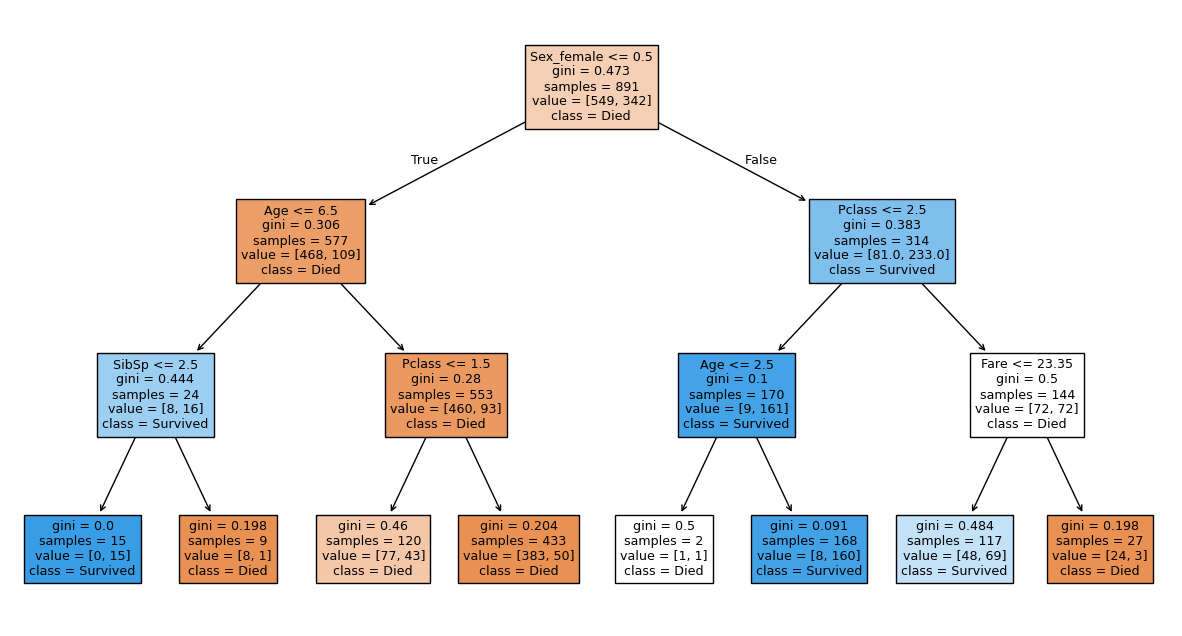

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)